# Лабораторная работа №2
## Фильтрация изображений
**Для работы с изображением использовать `OpenCV` (открытие, сохранение и т.д.). Для визуализации можно использовать `matplotlib`. Все необходимые для задания функции реализовывать самим, а не использовать готовые в `OpenCV`, если не указано обратного. С изображениями рабоать цветными по каждому из каналов.
### 1. Считать цветное RGB изображение

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as  plt
from random import randint

In [144]:
img =  cv2.imread('inbows.jpg')
b=img[:,:,0]
g=img[:,:,1]
r=img[:,:,2]


In [145]:
img = np.dstack((r,g,b))

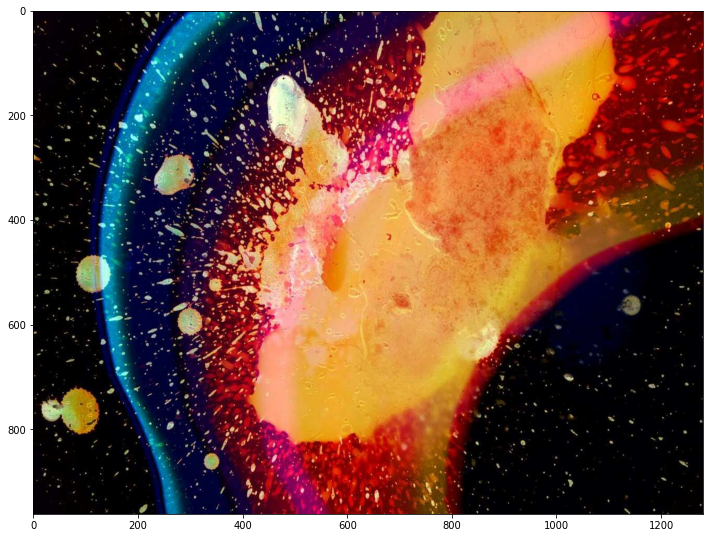

In [146]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.imshow(img)
plt.show()

### 2. Зашумить изображение аддитивным шумом с вероятностью 0,13.
- вход: изображение из пункта 1
- вывод: зашумленное изображение

In [5]:
img_2 = np.array(img, copy=True)
for i in range(len(img)):
    for j in range(len(img[0])):
        p = randint(1,100)
        if p < 14:
            img_2[i][j] = 255

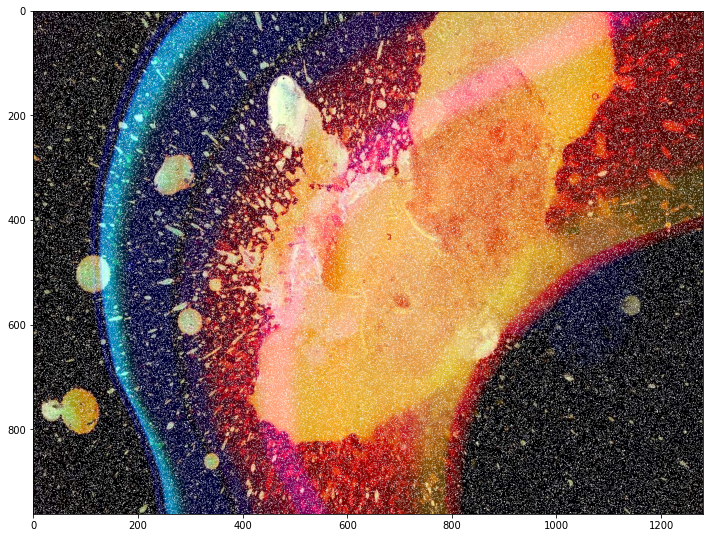

In [6]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.imshow(img_2)
plt.show()

### 3. Написать функцию реализации ранговой фильтрации
Функцию вида *fun(Image, window, rank)*, где *window* - окно фильтрации (по вариантам), *rank* - опциональный параметр, значение ранга в ранговой фильрации.

In [7]:
my_window = [[1,2,1],[2,1,2],[1,2,1]]

In [27]:
import math

def filter_rank(image):
    size_image = image.shape
    n_size = int(input('Введите размер окна (нечетное): '))
    k_factor = int(input('Введите коэффициент выборки (от 0% до 100%):'))
    border = math.floor(n_size / 2)
    k = int((n_size ** 2) * (k_factor / 100))
    if k_factor == 100:
        l = int((n_size ** 2) - k)
        k -= 1
    else: l = int((n_size ** 2) - k - 1)
    del k_factor, n_size
    for h in range(border, size_image[0] - border):  # height
        for w in range(border, size_image[1] - border):  # width
            arr_pixels, center_pixel_sum = [], 0
            for h_min in range(-border, border + 1):
                for w_min in range(-border, border + 1):
                    r, g, b = int(image[h + h_min][w + w_min][0]), \
                              int(image[h + h_min][w + w_min][1]), \
                              int(image[h + h_min][w + w_min][2])
                    sum_color = (r + g + b)
                    if h_min == 0 and w_min == 0:
                        center_pixel_sum = sum_color
                    pixel = [r, g, b, sum_color]
                    arr_pixels.append(pixel)
                    del pixel, r, g, b, sum_color
            del h_min, w_min
            arr_pixels = [[1,2,1],[2,1,2],[1,2,1]]
            print(arr_pixels)
            factor = 0
            if math.fabs(arr_pixels[k][2] - center_pixel_sum) < math.fabs(arr_pixels[l][2] - center_pixel_sum):
                factor = k
            elif math.fabs(arr_pixels[k][2] - center_pixel_sum) >= math.fabs(arr_pixels[l][2] - center_pixel_sum):
                factor = l
            arr_pixels[factor].pop(2)
            if size_image[2] > 3: arr_pixels[factor].append(255)
            image[h][w] = arr_pixels[factor]
            arr_pixels.clear()
    return image

In [28]:
rank_img = filter_rank(img_2)

[[1, 2, 1], [2, 1, 2], [1, 2, 1]]


IndexError: list index out of range

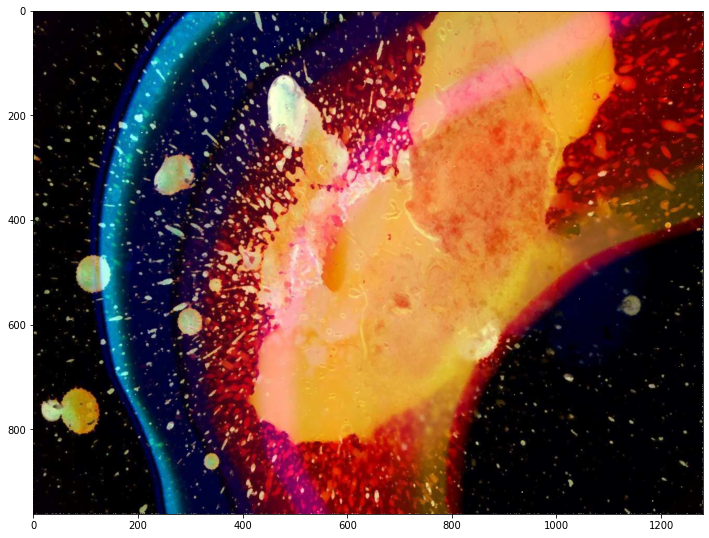

In [185]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.imshow(rank_img)
plt.show()

#### 4. Отфильтровать зашумленное изображение со всеми возможными рангами (кол-во рангов зависит от окна по вариантам).
Подсчитать СКО для результата фильтрации с каждым рангом.
- вход: изображение из пункта 2
- вывод: значение СКО для каждого ранга. Исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованые изображения для первого, последнего ранга, а так же для ранга с наименьшим СКО.
- СКО считать между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

### 5. Написать функцию реализации свертки.
Функцию вида *fun(mat1, mat2)*, где *mat1* - первый сигнал, в данном случае изображение. *mat2* - второй сигнал. В данном случае ядро КИХ фильтра.

In [27]:
def nested_sum(L):
    total = 0 
    for i in L:
        if isinstance(i, list):
            total += nested_sum(i)
        else:
            total += i
    return total

In [173]:
def convolution(img, kernel):
    r,g,b = img[:,:,0], img[:,:,1],img[:,:,2]
    r_copy, g_copy, b_copy = np.array(r,copy=True),np.array(g,copy=True),np.array(b,copy=True)
    l = len(kernel)
    step = int((l+1)/2-1)
    square = kernel[:l-1]
    coef = kernel[l-1]

    for i in range(step, len(img)-step):
        for j in range(step, len(img[0])-step):
            window_red = []
            window_green = []
            window_blue = []
            for x in range(i-step, i+step+1):
                window_red.append([])
                window_green.append([])
                window_blue.append([])
                for y in range(j-step, j+step+1):
                    window_red[-1].append(r[x][y])
                    window_green[-1].append(g[x][y])
                    window_blue[-1].append(b[x][y])
            r_copy[i][j] = sum(nested_sum(np.array(window_red)*square/coef))
            g_copy[i][j] = sum(nested_sum(np.array(window_green)*square/coef))
            b_copy[i][j] = sum(nested_sum(np.array(window_blue)*square/coef))

    return np.dstack((r_copy,g_copy,b_copy))

### 6. Отфильтровать изображение КИХ фильтром с ядром заданным по вариантам. Подсчитать СКО. Сравнить с результатами пункта 4.
- вход: изображение из пункта 2
- вывод: значение СКО. Исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение.
- СКО считать между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

my kernel:
$$ 1/7 \begin{pmatrix} 0&1&0 \\ 1&3&1 \\ 0&1&0 \end{pmatrix} $$

In [174]:
kernel = [[0,1,0],[1,3,1],[0,1,0],1/7]
img_6 = convolution(img_2,kernel)

In [175]:
from math import sqrt
def mean_sq_disp(im1, im2):
    total = 0
    n = im1.shape[0]*im1.shape[1]
    for i in range(len(im1)):
        for j in range(len(im2[0])):
            for ch in range(3):
                m = (im1[i][j][ch]-im2[i][j][ch])**2
                total+=m
    total/=n
    res = sqrt(total)
    return res

In [176]:
mean_sq_disp(img_2, img_6)

C:\Temp/ipykernel_8400/2871939613.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  m = (im1[i][j][ch]-im2[i][j][ch])**2
C:\Temp/ipykernel_8400/2871939613.py:9: RuntimeWarning: overflow encountered in int_scalars
  total+=m


10.480946656716938

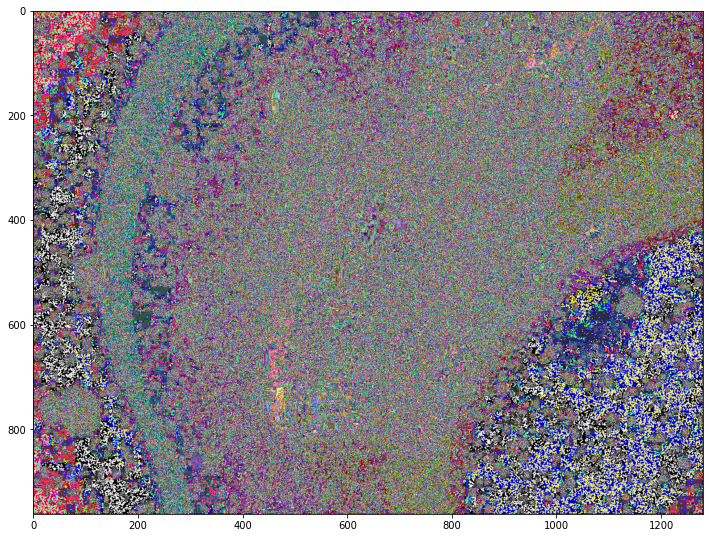

In [177]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.imshow(img_6)
plt.show()